# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, ttest_ind
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [8]:
medical.shape

(1338, 8)

In [10]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

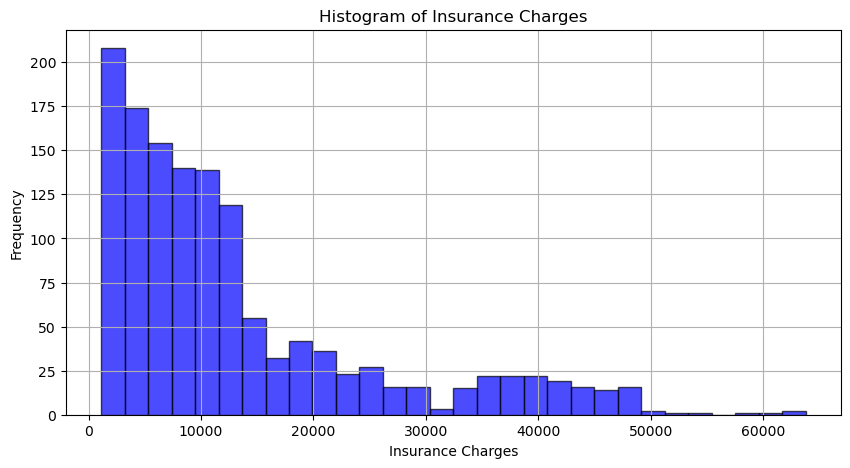

Mean of Charges: 13270.42
Standard Deviation of Charges: 12110.01


In [16]:
# Plot the histogram of charges
plt.figure(figsize=(10, 5))
plt.hist(medical['charges'], bins=30, color="blue", alpha=0.7, edgecolor="black")
plt.xlabel("Insurance Charges")
plt.ylabel("Frequency")
plt.title("Histogram of Insurance Charges")
plt.grid(True)
plt.show()

# Calculate mean and standard deviation
mean_charges = np.mean(medical['charges'])
std_charges = np.std(medical['charges'], ddof=1)  # Using sample standard deviation (N-1)

print(f"Mean of Charges: {mean_charges:.2f}")
print(f"Standard Deviation of Charges: {std_charges:.2f}")

In [ ]:
#Analysis and Appropriateness of the Mean and STD:

#If the histogram is symmetric and bell-shaped (normal distribution):
#The mean and standard deviation are appropriate descriptive statistics.
#They summarize the data well because most values are centered around the mean, with a predictable spread.

#If the histogram is right-skewed (common in insurance charges):
#The mean may not be the best representation because it can be pulled upward by very high charges (outliers).
#The median might be a better measure of central tendency in this case.
#Standard deviation might not be meaningful if the data has a long tail.

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__
If the sample is randomly drawn, it provides an unbiased estimate of the true population mean.

By calculating a confidence interval or performing a hypothesis test, we can determine whether there is enough evidence to conclude that the population mean is below 12,000.

The most appropriate test to apply in this situation is a one-sample t-test because:
- The population standard deviation is unknown, so we must estimate it using the sample standard deviation.
- The sample size is finite, meaning we use the t-distribution instead of the normal distribution.
- We are testing whether the population mean is less than 12,000, which suggests a one-tailed test.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__
Since the administrator is specifically concerned about whether the true mean charge has fallen below $12,000$, we need to test for a decrease rather than simply checking for any deviation.

A two-sided confidence interval would check whether the mean differs in either direction (higher or lower than $12,000$).

However, since we are only concerned with the lower bound, a one-sided confidence interval is more appropriate.

Thus, we compute a one-sided lower confidence bound for the mean charge.

In [18]:
# Sample statistics
mean_charges = np.mean(medical['charges'])
std_charges = np.std(medical['charges'], ddof=1)  # Sample standard deviation
n = len(medical['charges'])

# Significance level for a one-sided 95% confidence interval
alpha = 0.05  
t_critical = t.ppf(1 - alpha, df=n-1)  # One-tailed critical value

# Compute the margin of error
margin_error = t_critical * (std_charges / np.sqrt(n))

# Compute the lower bound of the confidence interval
lower_bound = mean_charges - margin_error

print(f"Mean Charges: {mean_charges:.2f}")
print(f"Standard Deviation: {std_charges:.2f}")
print(f"Sample Size: {n}")
print(f"Critical t-value: {t_critical:.4f}")
print(f"Margin of Error: {margin_error:.2f}")
print(f"Lower Bound of 95% Confidence Interval: {lower_bound:.2f}")

Mean Charges: 13270.42
Standard Deviation: 12110.01
Sample Size: 1338
Critical t-value: 1.6460
Margin of Error: 544.94
Lower Bound of 95% Confidence Interval: 12725.49


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__
- Null Hypothesis: Insured and uninsured individuals are charged the same on average
- Alternative Hypothesis: There is a difference in charges between the two groups
  
- The assumptions about the variances of the two groups are:
- We assume equal variances in both groups (homoscedasticity).
- If this assumption is violated, Welch’s t-test should be used instead.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [22]:
print(medical.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')


In [26]:
print(f"Number of insured: {n1}")
print(f"Number of uninsured: {n2}")

Number of insured: 0
Number of uninsured: 0


In [28]:
print(medical['insuranceclaim'].unique())

[1 0]


In [30]:
# Split data into insured and uninsured groups
insured = medical[medical['insuranceclaim'] == 1]['charges']
uninsured = medical[medical['insuranceclaim'] == 0]['charges']

# Get the sample sizes
n1, n2 = len(insured), len(uninsured)

# Print the sample sizes
print(f"Number of insured: {n1}")
print(f"Number of uninsured: {n2}")

Number of insured: 783
Number of uninsured: 555


In [38]:
# Sample statistics
n1, n2 = len(insured), len(uninsured)
x1, x2 = np.mean(insured), np.mean(uninsured)
s1, s2 = np.std(insured, ddof=1), np.std(uninsured, ddof=1)

# Manual pooled standard deviation calculation
sp = np.sqrt(((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / (n1 + n2 - 2))

# Manual t-statistic calculation
t_stat_manual = (x1 - x2) / (sp * np.sqrt(1/n1 + 1/n2))

# Compute p-value (two-tailed test)
df = n1 + n2 - 2  # Degrees of freedom
p_value_manual = 2 * (1 - t.cdf(abs(t_stat_manual), df))

# Using scipy function
t_stat_scipy, p_value_scipy = ttest_ind(insured, uninsured, equal_var=True)

# Print results
print(f"Manual Calculation: t-statistic = {t_stat_manual:.4f}, p-value = {p_value_manual:.4f}")
print(f"SciPy Function: t-statistic = {t_stat_scipy:.4f}, p-value = {p_value_scipy:.4f}")

Manual Calculation: t-statistic = 11.8933, p-value = 0.0000
SciPy Function: t-statistic = 11.8933, p-value = 0.0000


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__

In scipy.stats, there isn't a direct function for performing a z-test in the same way that we have ttest_ind for the t-test. This is because a z-test is typically used when the population variance is known (or when the sample size is large enough that we can use the sample variance as an estimate of the population variance).

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test